In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.activations import relu, sigmoid

from sklearn.preprocessing import StandardScaler

%matplotlib inline

Description of the data:

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [2]:
rides = pd.read_csv('hour.csv')
rides['time'] = pd.to_datetime(rides['dteday'])+pd.Series([pd.DateOffset(hours = a ) for a in rides.hr.tolist()])
rides.drop(['instant','yr','dteday','casual','registered', 'atemp'],1,inplace=True)
rides['t'] = rides.time.values.astype(float)
rides.head()

/Users/sachin/anaconda/lib/python3.5/site-packages/pandas/core/ops.py:533: PerformanceWarning: Adding/subtracting array of DateOffsets to Series not vectorized
  "Series not vectorized", PerformanceWarning)


,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,time,t
0,1,1,0,0,6,0,1,0.24,0.81,0.0,16,2011-01-01 00:00:00,1.293840e+18
1,1,1,1,0,6,0,1,0.22,0.80,0.0,40,2011-01-01 01:00:00,1.293844e+18
2,1,1,2,0,6,0,1,0.22,0.80,0.0,32,2011-01-01 02:00:00,1.293847e+18
3,1,1,3,0,6,0,1,0.24,0.75,0.0,13,2011-01-01 03:00:00,1.293851e+18
4,1,1,4,0,6,0,1,0.24,0.75,0.0,1,2011-01-01 04:00:00,1.293854e+18


Get **one hot encoded** values of the categorical variables:

In [3]:
cat_features = ['season', 'hr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
rides = pd.get_dummies(rides, columns=cat_features)
rides.head()

,temp,hum,windspeed,cnt,time,t,season_1,season_2,season_3,season_4,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0.24,0.81,0.0,16,2011-01-01 00:00:00,1.293840e+18,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0
1,0.22,0.80,0.0,40,2011-01-01 01:00:00,1.293844e+18,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0
2,0.22,0.80,0.0,32,2011-01-01 02:00:00,1.293847e+18,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0
3,0.24,0.75,0.0,13,2011-01-01 03:00:00,1.293851e+18,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0
4,0.24,0.75,0.0,1,2011-01-01 04:00:00,1.293854e+18,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0


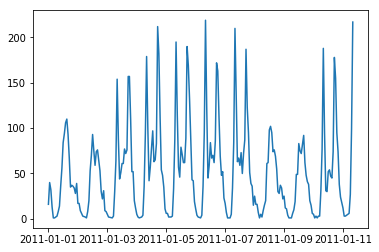

In [4]:
plt.plot(rides.time[:240],rides.cnt[:240])
plt.show()

In [5]:
quant_features = ['temp', 'hum', 'windspeed','t']
x_scaler = StandardScaler()
rides[quant_features] = x_scaler.fit_transform(rides[quant_features].values)

y_scaler = StandardScaler()
rides['cnt'] = y_scaler.fit_transform(rides['cnt'].values[:,None])

rides.head()

/Users/sachin/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


,temp,hum,windspeed,cnt,time,t,season_1,season_2,season_3,season_4,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,-1.334648,0.947372,-1.553889,-0.956339,2011-01-01 00:00:00,-1.745435,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0
1,-1.438516,0.895539,-1.553889,-0.824022,2011-01-01 01:00:00,-1.745236,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0
2,-1.438516,0.895539,-1.553889,-0.868128,2011-01-01 02:00:00,-1.745038,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0
3,-1.334648,0.636370,-1.553889,-0.972879,2011-01-01 03:00:00,-1.744840,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0
4,-1.334648,0.636370,-1.553889,-1.039037,2011-01-01 04:00:00,-1.744641,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0


## Initial model (1 hidden layer with Relu activations)

Split data into testing and training

In [6]:
train_data = rides[:-21*24]
test_data = rides[-21*24:]

train_x = train_data.drop(['cnt','time'],axis=1).values
test_x = test_data.drop(['cnt','time'],axis=1).values

In [7]:
train_x.shape

(16875, 59)

Look at https://keras.io/#getting-started-30-seconds-to-keras for the architecture.
Hints: 
1. Let `input_dim = train_x.shape[1]`.
2. Let the last layer be `Dense(1)` with no activation
3. For the `model.compile` part let `loss='mse'`(mean squared error). As for the optimizer part, choose one from the following: https://imgur.com/a/Hqolp (there is no NAG or Momentum optimizers though)

In [27]:
model = Sequential()
# TODO get a one hidden layer network (let the number of hidden units be half way between input and last layer)

In [9]:
# Train the model
model.fit(train_x, train_data['cnt'], batch_size=256, epochs=11)

Epoch 1/11
16875/16875 [==============================] - 0s - loss: 1.0494     
Epoch 2/11
16875/16875 [==============================] - 0s - loss: 0.7263     
Epoch 3/11
16875/16875 [==============================] - 0s - loss: 0.5620     
Epoch 4/11
16875/16875 [==============================] - 0s - loss: 0.4589     
Epoch 5/11
16875/16875 [==============================] - 0s - loss: 0.3864     
Epoch 6/11
16875/16875 [==============================] - 0s - loss: 0.3356     
Epoch 7/11
16875/16875 [==============================] - 0s - loss: 0.3007     
Epoch 8/11
16875/16875 [==============================] - 0s - loss: 0.2766     
Epoch 9/11
16875/16875 [==============================] - 0s - loss: 0.2584     
Epoch 10/11
16875/16875 [==============================] - 0s - loss: 0.2431     
Epoch 11/11
16875/16875 [==============================] - 0s - loss: 0.2293     


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 29)                1740      
_________________________________________________________________
activation_1 (Activation)    (None, 29)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 30        
Total params: 1,770.0
Trainable params: 1,770.0
Non-trainable params: 0.0
_________________________________________________________________


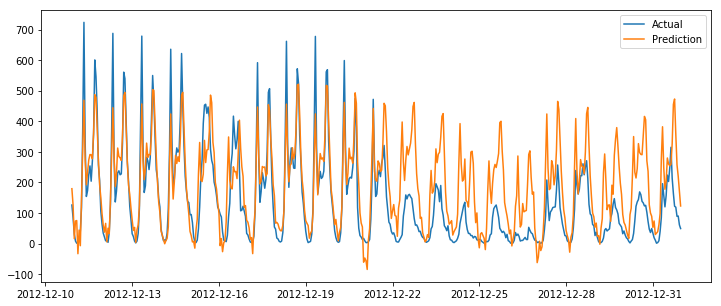

In [11]:
pred_y = # TODO: predict on the test set (again refer to 30 seconds with keras link above)
plt.figure(figsize=(12,5))
plt.plot(test_data.time, y_scaler.inverse_transform(test_data.cnt), label='Actual')
plt.plot(test_data.time, y_scaler.inverse_transform(pred_y), label='Prediction')
plt.legend()
plt.show()

It's important that you understand the difference between `model.predict` and `model.evaluate`.

In [12]:
model.evaluate(test_x, test_data['cnt'], batch_size=256)

256/504 [==============>...............] - ETA: 0s

0.39349144981020973

In [13]:
#! pip install graphviz
#! pip install pydot-ng

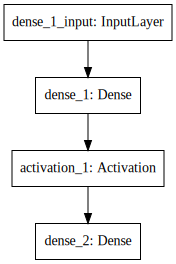

In [14]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Two Layer hidden network

In [16]:
train_x.shape

(16875, 59)

In [17]:
h_nodes = [20, 40]
# TODO: two layer hidden network with the number of hidden units as mentioned in `h_nodes`

Epoch 1/11
16875/16875 [==============================] - 0s - loss: 0.7995     
Epoch 2/11
16875/16875 [==============================] - 0s - loss: 0.5246     
Epoch 3/11
16875/16875 [==============================] - 0s - loss: 0.3446     
Epoch 4/11
16875/16875 [==============================] - 0s - loss: 0.2460     
Epoch 5/11
16875/16875 [==============================] - 0s - loss: 0.1982     
Epoch 6/11
16875/16875 [==============================] - 0s - loss: 0.1675     
Epoch 7/11
16875/16875 [==============================] - 0s - loss: 0.1462     
Epoch 8/11
16875/16875 [==============================] - 0s - loss: 0.1296     
Epoch 9/11
16875/16875 [==============================] - 0s - loss: 0.1161     
Epoch 10/11
16875/16875 [==============================] - 0s - loss: 0.1045     
Epoch 11/11
16875/16875 [==============================] - 0s - loss: 0.0950     


In [18]:
model.evaluate(test_x, test_data['cnt'], batch_size=256)

256/504 [==============>...............] - ETA: 0s

0.28692415971604607

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 40)                2400      
_________________________________________________________________
activation_2 (Activation)    (None, 40)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                820       
_________________________________________________________________
activation_3 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 3,241.0
Trainable params: 3,241.0
Non-trainable params: 0.0
_________________________________________________________________


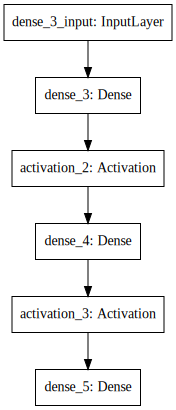

In [20]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Best Hyper parameters

In [1]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

Using Theano backend.


What is Cross Validation?
https://stats.stackexchange.com/questions/1826/cross-validation-in-plain-english

In [22]:
import keras.backend as K

def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            # TODO: Add a dense layer
            model.add(Activation(activation))
        else:
            # TODO: Add a Dense later AND activation (see above)
            
    #TODO: Add last dense layer # Note: no activation beyond this point
    
    model.compile(optimizer='adadelta', loss='mse')
    return model
    
model = KerasRegressor(build_fn=create_model, verbose=0)    

In [23]:
layers = [[30], [20, 40], [15, 30, 40]]
activations = [sigmoid, relu]
param_grid = dict(layers=layers, activation=activations, batch_size = [256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error')

In [24]:
grid_result = grid.fit(train_x, train_data['cnt'])

In [25]:
[grid_result.best_score_, grid_result.best_params_]

[-0.15730031157267707,
 {'activation': <function keras.activations.relu>,
  'batch_size': 256,
  'epochs': 30,
  'layers': [15, 30, 40]}]

In [26]:
for params, mean_score, scores in grid_result.grid_scores_:
    print("%f (%f) with: %r" % (scores.mean(), scores.std(), params))

-0.368126 (0.164836) with: {'batch_size': 256, 'layers': [30], 'epochs': 30, 'activation': <function sigmoid at 0x1130b9400>}
-0.343356 (0.157840) with: {'batch_size': 256, 'layers': [20, 40], 'epochs': 30, 'activation': <function sigmoid at 0x1130b9400>}
-0.322100 (0.167121) with: {'batch_size': 256, 'layers': [15, 30, 40], 'epochs': 30, 'activation': <function sigmoid at 0x1130b9400>}
-0.206197 (0.104541) with: {'batch_size': 256, 'layers': [30], 'epochs': 30, 'activation': <function relu at 0x1130b92f0>}
-0.164863 (0.084932) with: {'batch_size': 256, 'layers': [20, 40], 'epochs': 30, 'activation': <function relu at 0x1130b92f0>}
-0.157300 (0.067843) with: {'batch_size': 256, 'layers': [15, 30, 40], 'epochs': 30, 'activation': <function relu at 0x1130b92f0>}


/Users/sachin/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_search.py:662: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [31]:
grid_result.best_params_

{'activation': <function keras.activations.relu>,
 'batch_size': 256,
 'epochs': 30,
 'layers': [15, 30, 40]}